In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("\nEigenvalues \n%s" % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


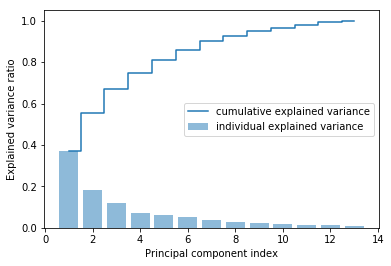

In [8]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, alpha = 0.5, align = "center", label = "individual explained variance")
plt.step(range(1,14), cum_var_exp, where = "mid", label = "cumulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc = "best")
plt.show()

In [9]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

In [10]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print("Matrix W:\n", w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [11]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [12]:
X_train_pca = X_train_std.dot(w)

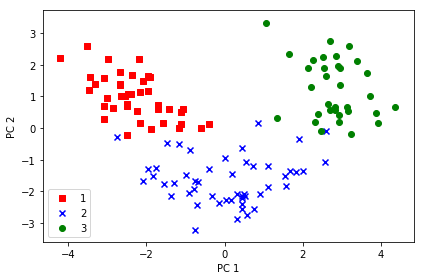

In [14]:
colors = ["r", "b", "g"]
markers = ["s", "x", "o"]
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c = c, label = l, marker = m)
    
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

In [15]:
%run -i tools.py

<Figure size 432x288 with 0 Axes>

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or 

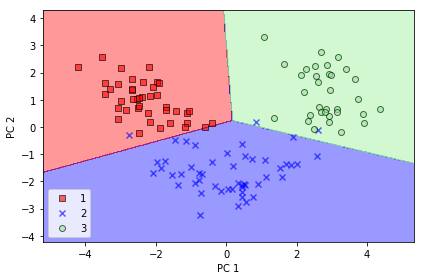

In [20]:
pca = PCA(n_components = 2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions3(X_train_pca, y_train, classifier = lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


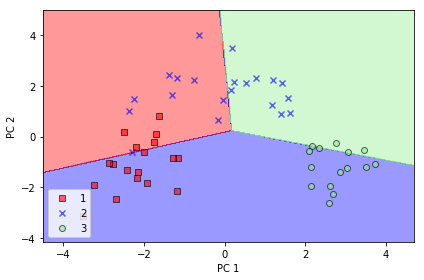

In [21]:
plot_decision_regions3(X_test_pca, y_test, classifier = lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

In [22]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [23]:
np.set_printoptions(precision = 4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis = 0))
    print("NV %s: %s\n" % (label, mean_vecs[label-1]))

NV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

NV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

NV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [25]:
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print("Within-class scatter matrix: %s x %s" % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13 x 13


In [26]:
print("Class label distribution: %s" % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [27]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print("Scaled within-class scatter matrix: %s x %s" % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13 x 13


In [28]:
mean_overall = np.mean(X_train_std, axis = 0)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec, in enumerate(mean_vecs):
    n = X_train[y_train == i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print("Between-class scatter matrix: %s x %s" % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13 x 13


In [29]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)
print("Eigenvalues in descending order:\n")
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059939
172.76152218979388
3.7853134512521556e-14
2.117398448224407e-14
1.5164618894178885e-14
1.5164618894178885e-14
1.3579567140455979e-14
1.3579567140455979e-14
7.587760371654683e-15
5.906039984472233e-15
5.906039984472233e-15
2.256441978569674e-15
0.0


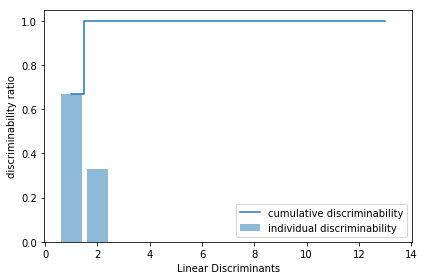

In [30]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha = 0.5, align = "center", label = "individual discriminability")
plt.step(range(1, 14), cum_discr, where = "mid", label = "cumulative discriminability")
plt.ylabel("discriminability ratio")
plt.xlabel("Linear Discriminants")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

In [31]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
print("Matrix W:\n", w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


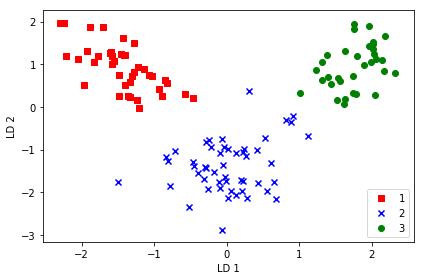

In [32]:
X_train_lda = X_train_std.dot(w)
colors = ["r", "b", "g"]
markers = ["s", "x", "o"]
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c = c, label = l, marker = m)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or 

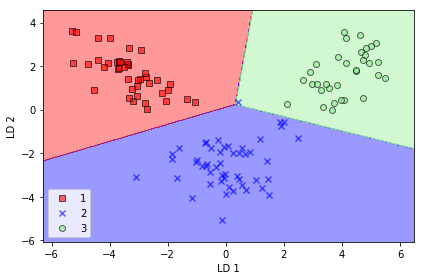

In [35]:
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)
plot_decision_regions3(X_train_lda, y_train, classifier = lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


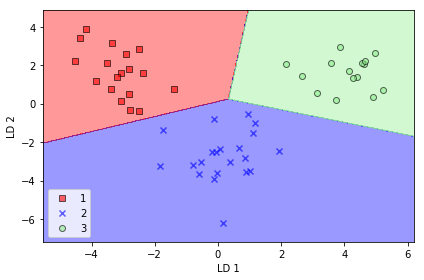

In [36]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions3(X_test_lda, y_test, classifier = lr)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc = "lower left")
plt.tight_layout()
plt.show()

In [38]:
%run -i kernelPCA.py

In [39]:
from sklearn.datasets import make_moons

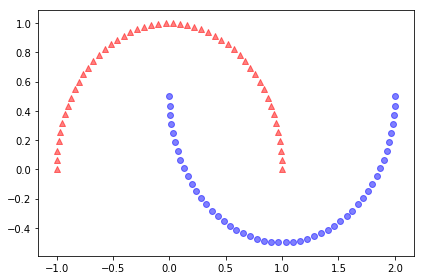

In [40]:
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = "red", marker = "^", alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = "blue", marker = "o", alpha = 0.5)
plt.tight_layout()
plt.show()

In [41]:
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)

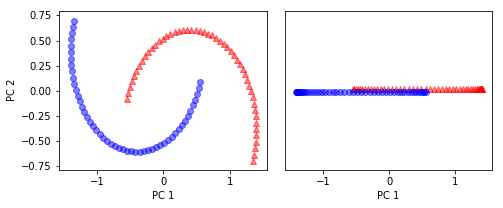

In [42]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color = "red", marker = "^", alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color = "blue", marker = "o", alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1))+.02, color = "red", marker = "^", alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1))-.02, color = "blue", marker = "o", alpha = 0.5)
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC 1")
plt.tight_layout()
plt.show()

In [43]:
from matplotlib.ticker import FormatStrFormatter

kernelPCA.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))


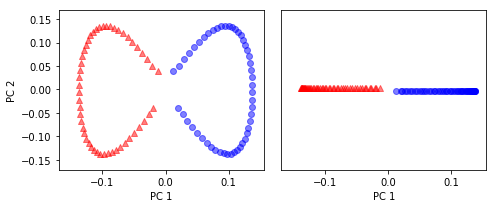

In [44]:
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = "red", marker = "^", alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = "blue", marker = "o", alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1))+.02, color = "red", marker = "^", alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1))-.02, color = "blue", marker = "o", alpha = 0.5)
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC 1")
plt.tight_layout()
plt.show()

In [45]:
from sklearn.datasets import make_circles

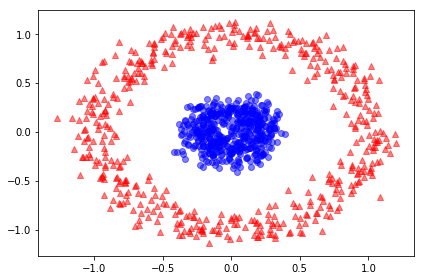

In [46]:
X, y = make_circles(n_samples = 1000, random_state = 123, noise = .1, factor = .2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = "red", marker = "^", alpha = .5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = "blue", marker = "o", alpha = .5)
plt.tight_layout()
plt.show()

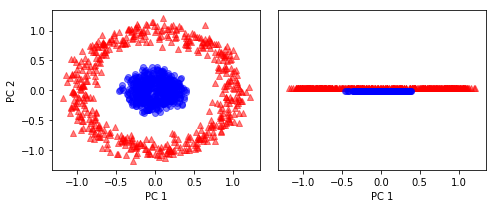

In [47]:
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color = "red", marker = "^", alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color = "blue", marker = "o", alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1))+.02, color = "red", marker = "^", alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1))-.02, color = "blue", marker = "o", alpha = 0.5)
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC 1")
plt.tight_layout()
plt.show()

In [48]:
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)

kernelPCA.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))


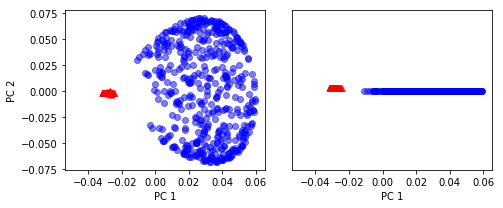

In [49]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = "red", marker = "^", alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = "blue", marker = "o", alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1))+.02, color = "red", marker = "^", alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1))-.02, color = "blue", marker = "o", alpha = 0.5)
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel("PC 1")
plt.tight_layout()
plt.show()

In [54]:
%run -i kPCA2.py

In [55]:
X, y = make_moons(n_samples = 100, random_state = 123)
alphas, lambdas = rbf_kernel_pca(X, gamma = 15, n_components = 1)

kPCA2.py:28: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  alphas = np.column_stack((eigvecs[:, i] for i in range(n_components)))


In [58]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [53]:
x_proj = alphas[25]
x_proj

array([0.0788])

In [59]:
x_reproj = project_x(x_new, X, gamma = 15, alphas = alphas, lambdas = lambdas)
x_reproj

array([0.0788])

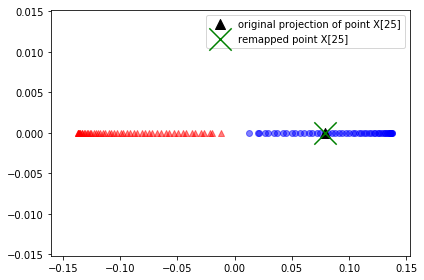

In [60]:
plt.scatter(alphas[y == 0, 0], np.zeros((50)), color = "red", marker = "^", alpha = .5)
plt.scatter(alphas[y == 1, 0], np.zeros((50)), color = "blue", marker = "o", alpha = .5)
plt.scatter(x_proj, 0, color = "black", label = "original projection of point X[25]", marker = "^", s = 100)
plt.scatter(x_reproj, 0, color = "green", label = "remapped point X[25]", marker = "x", s = 500)
plt.legend(scatterpoints = 1)
plt.tight_layout()
plt.show()

In [61]:
from sklearn.decomposition import KernelPCA

In [62]:
X, y = make_moons(n_samples = 100, random_state = 123)
scikit_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 15)
X_skernpca = scikit_pca.fit_transform(X)

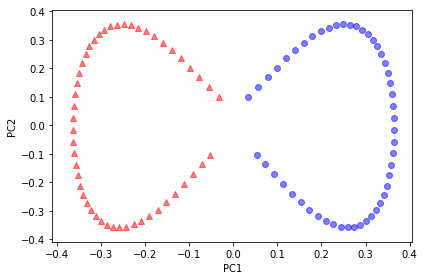

In [64]:
plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1], color = "red", marker = "^", alpha = 0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1], color = "blue", marker = "o", alpha = 0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()